# 🫀 Heart Disease Prediction - Logistic Regression & Decision Tree

**Objective**: Predict if a person has heart disease based on medical data using classification models.

**Dataset**: UCI Heart Cleveland Dataset (`heart.csv`)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


## 📊 Step 1: Load and Inspect Data


In [2]:
df = pd.read_csv('heart.csv')  # or use the correct path if running locally
print(df.head())
print(df.info())
print(df.isnull().sum())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       29

##  Step 2: Prepare Features and Target


In [3]:
X = df.drop('condition', axis=1)
y = df['condition']


## 🔄 Step 3: Train-Test Split and Scaling


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 🤖 Step 4: Train Logistic Regression Model


In [5]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60

Confusion Matrix:
 [[23  9]
 [ 7 21]]


In [6]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.66      0.67        32
           1       0.62      0.64      0.63        28

    accuracy                           0.65        60
   macro avg       0.65      0.65      0.65        60
weighted avg       0.65      0.65      0.65        60

Confusion Matrix:
 [[21 11]
 [10 18]]


## 📈 Step 5: ROC Curve (Logistic Regression)


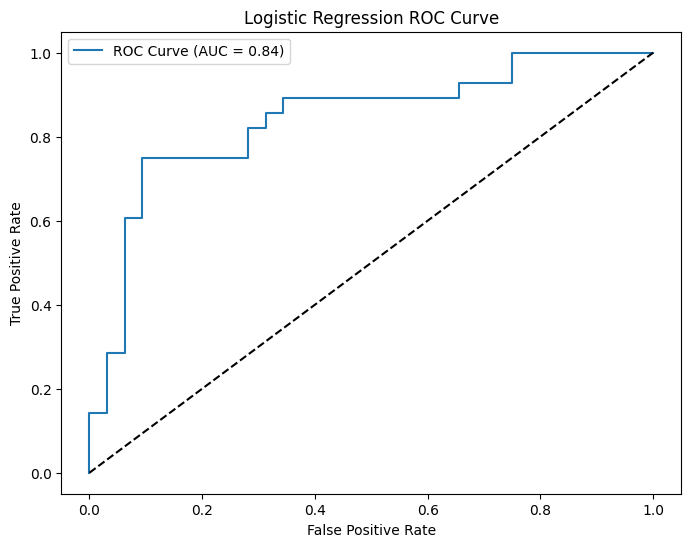

In [7]:
y_prob_lr = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show()


## 🌟 Step 6: Feature Importance


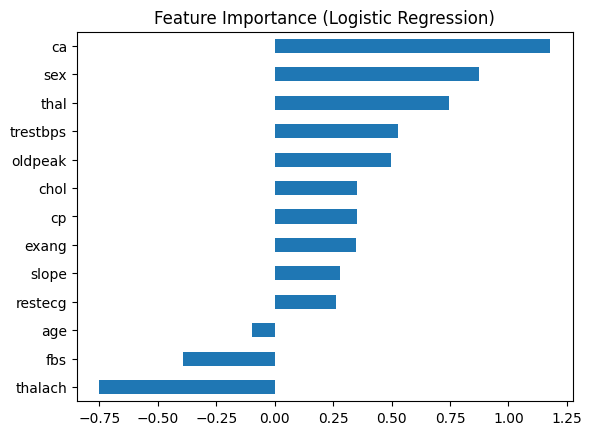

In [8]:
importance = pd.Series(lr.coef_[0], index=X.columns)
importance.sort_values().plot(kind='barh', title='Feature Importance (Logistic Regression)')
plt.show()


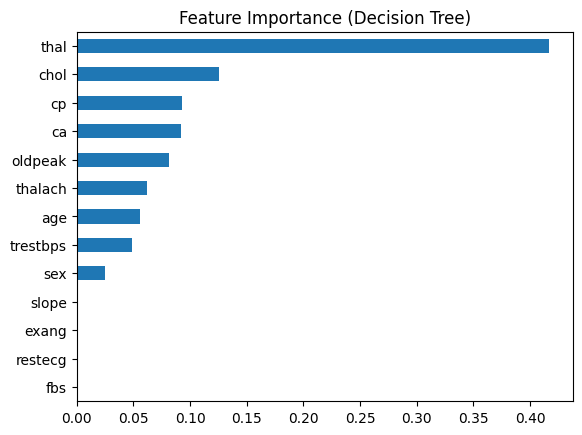

In [9]:
importance = pd.Series(dt.feature_importances_, index=X.columns)
importance.sort_values().plot(kind='barh', title='Feature Importance (Decision Tree)')
plt.show()
